In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\emmau\AppData\Local\Temp\pip-install-yt04aae6\tensorflow-gpu_82c6a4b88373492bbbd0851b98fca686\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautif

In [7]:
!pip install keras

In [47]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
import random
from shutil import copyfile

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [48]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 125 files belonging to 2 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [50]:
batch = data_iterator.next()

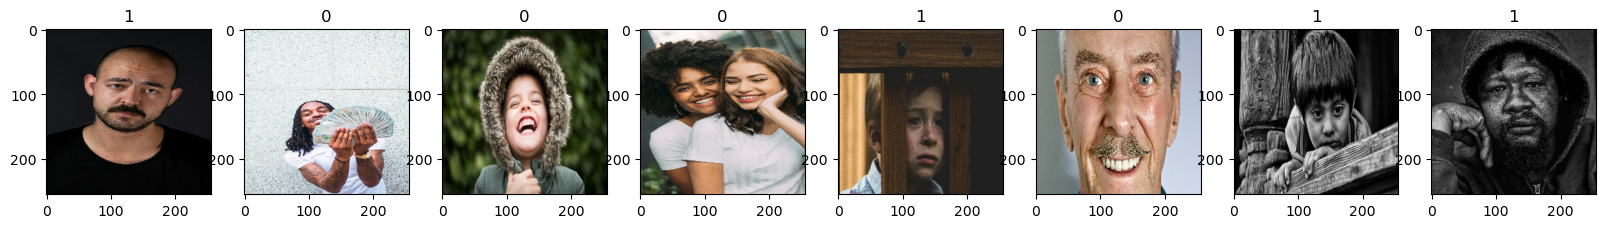

In [56]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [57]:
data = data.map(lambda x,y: (x/255, y))

In [58]:
data.as_numpy_iterator().next()

(array([[[[0.6257889 , 0.67897516, 0.6772595 ],
          [0.6762255 , 0.73811275, 0.7324755 ],
          [0.63871783, 0.7132276 , 0.7053845 ],
          ...,
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         [[0.8487056 , 0.88669574, 0.8827742 ],
          [0.8716529 , 0.9108686 , 0.906947  ],
          [0.8392157 , 0.8862745 , 0.8784314 ],
          ...,
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         [[0.874257  , 0.90955114, 0.9056296 ],
          [0.8970818 , 0.9206112 , 0.9206112 ],
          [0.87806374, 0.921201  , 0.9055147 ],
          ...,
          [0.9447304 , 0.9447304 , 0.9447304 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         ...,
 
         [[0.5084712 , 0.47709864, 0.42611825],
          [0.50612

In [60]:
int(len(data))

4

In [61]:
happy = os.path.join('./data/happy')
sad = os.path.join('./data/sad')

In [62]:
happy_names = os.listdir(happy)
print(f'HAPPY FACES: {happy_names[:10]}')

sad_names = os.listdir(sad)
print(f'SAD FACES: {sad_names[:10]}')

HAPPY FACES: ['anastasia-vityukova-9euorpmZbbk-unsplash.jpg', 'autumn-goodman-vTL_qy03D1I-unsplash.jpg', 'babi-akpZ94lE0ZM-unsplash.jpg', 'baptista-ime-james-ikysd1YGmU8-unsplash.jpg', 'baylee-gramling-RnHhR_sip7M-unsplash.jpg', 'ben-o-bro-C5XyLljkMrY-unsplash.jpg', 'ben-white-4K2lIP0zc_k-unsplash.jpg', 'benigno-hoyuela-72zsd_fnxYc-unsplash.jpg', 'bishka-nguyen-nJF42yBkQzg-unsplash.jpg', 'blake-cheek-6v11noBZVuo-unsplash.jpg']
SAD FACES: ['addy-mae-QSs2VBWGYHA-unsplash.jpg', 'adrian-swancar-lyhtI3rN1xM-unsplash.jpg', 'alex-sheldon-eIEuGshdTM4-unsplash.jpg', 'alexander-krivitskiy-ack_INKQT1c-unsplash.jpg', 'amin-moshrefi-twfoxW0hkwg-unsplash.jpg', 'ammi-alba-aJZDfsGfqw8-unsplash.jpg', 'angry-fastidious-young-dark-skinned-male-wearing-jersey-sweater-looking-down-having-squeamish-scornful-gaze-posing-indoors-against-gray-wall.jpg', 'asher-legg-JhWvFdT0qxg-unsplash.jpg', 'babi-NW61v3xF0-0-unsplash.jpg', 'ben-white-qYanN54gIrI-unsplash.jpg']


In [64]:
print(f'total training happy faces images: {len(os.listdir(happy))}')
print(f'total training sad faces images: {len(os.listdir(sad))}')

total training happy faces images: 60
total training sad faces images: 65


In [65]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

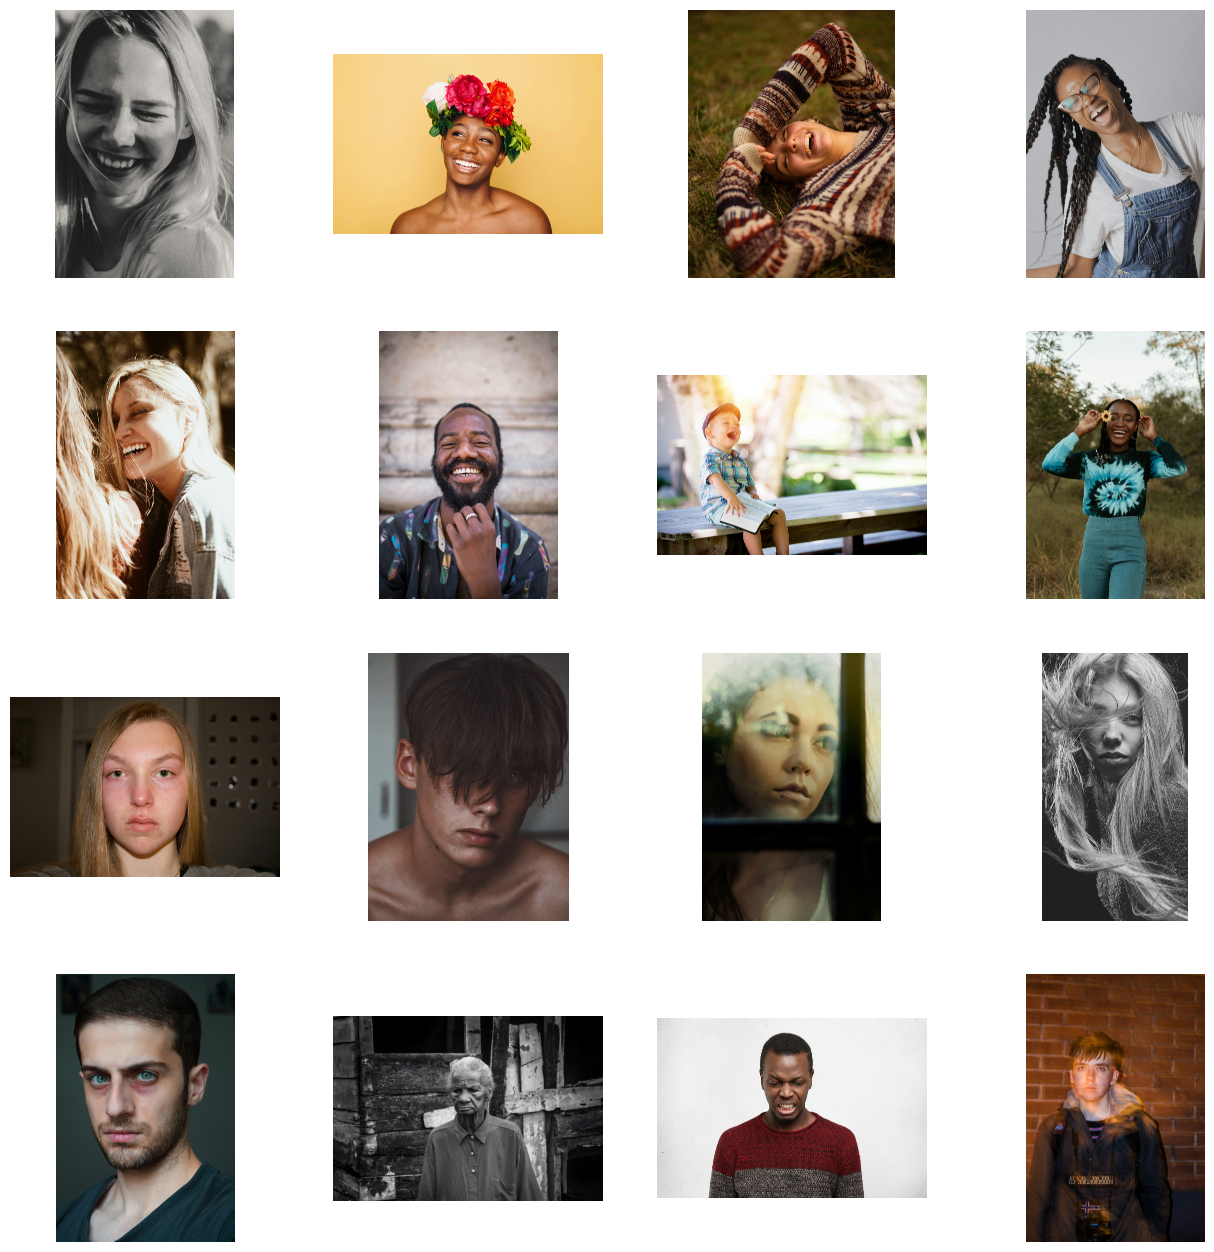

In [66]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(happy, fname) 
                for fname in happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad, fname) 
                for fname in sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [79]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your data folder
data_folder = 'data'

# Set the path to create train and validation folders
train_folder = 'train'
val_folder = 'val'

# Create train and validation folders
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Copy images from the original folders to train and validation folders
for emotion in ['happy', 'sad']:
    source_folder = os.path.join(data_folder, emotion)
    train_destination = os.path.join(train_folder, emotion)
    val_destination = os.path.join(val_folder, emotion)

    # Create train and validation subfolders for each emotion
    os.makedirs(train_destination, exist_ok=True)
    os.makedirs(val_destination, exist_ok=True)

    # Get the list of images in the source folder
    images = os.listdir(source_folder)

    # Calculate the split index
    split_index = int(0.8 * len(images))

    # Copy images to the train folder
    for img in images[:split_index]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(train_destination, img))

    # Copy images to the validation folder
    for img in images[split_index:]:
        shutil.copy(os.path.join(source_folder, img), os.path.join(val_destination, img))

# Optionally, you can use data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the ImageDataGenerator for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Create image generators for the training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary'  # 'binary' for two classes (happy and sad)
)

val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary'
)


Found 100 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [71]:
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
# test_size = int(len(data)*.1)

In [18]:
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [83]:
logdir='logs'

In [84]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:
hist = model.fit(train_generator, epochs=20, callbacks=[tensorboard_callback], verbose=1,
      validation_data = val_generator)

Epoch 1/20
7/7 [==============================] - 120s 17s/step - loss: 0.6944 - accuracy: 0.5200 - val_loss: 0.6893 - val_accuracy: 0.5200
Epoch 2/20
7/7 [==============================] - 92s 13s/step - loss: 0.6915 - accuracy: 0.5500
Epoch 3/20
7/7 [==============================] - 93s 12s/step - loss: 0.7392 - accuracy: 0.4900
Epoch 4/20
7/7 [==============================] - 105s 15s/step - loss: 0.6837 - accuracy: 0.5300
Epoch 5/20


Epoch 1/20
2/2 [==============================] - 28s 2s/step - loss: 1.5692 - accuracy: 0.4688
Epoch 2/20
2/2 [==============================] - 30s 3s/step - loss: 1.4909 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 35s 1s/step - loss: 0.7998 - accuracy: 0.4219
Epoch 4/20
2/2 [==============================] - 28s 2s/step - loss: 0.7373 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 26s 2s/step - loss: 0.7055 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 22s 1s/step - loss: 0.6733 - accuracy: 0.6562
Epoch 7/20
2/2 [==============================] - 22s 1s/step - loss: 0.6650 - accuracy: 0.8125
Epoch 8/20
2/2 [==============================] - 23s 1s/step - loss: 0.6450 - accuracy: 0.7500
Epoch 9/20
2/2 [==============================] - 23s 1s/step - loss: 0.6015 - accuracy: 0.8438
Epoch 10/20
2/2 [==============================] - 23s 2s/step - loss: 0.5717 - accuracy: 0.8281
Epoch 11/20
2/2 [======================

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#3 conv block, a flatten layer and 2 dense layer

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [172]:
from tensorflow.keras.optimizers import RMSprop

model.compile('adam', loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [173]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 30, 30, 16)       

### DATA PREPROCESSING

In [174]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './data/train',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 300x300
        batch_size=20,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './data/val',  # This is the source directory for validation images
        target_size=(256, 256),  # All images will be resized to 300x300
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 92 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


### Model Training

In [175]:
hist = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=4,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/4
2/2 [==============================] - 45s 30s/step - loss: 1.0923 - accuracy: 0.4062 - val_loss: 0.7401 - val_accuracy: 0.4000
Epoch 2/4
2/2 [==============================] - 41s 26s/step - loss: 0.6937 - accuracy: 0.6250 - val_loss: 0.9572 - val_accuracy: 0.5000
Epoch 3/4
2/2 [==============================] - 40s 31s/step - loss: 0.8025 - accuracy: 0.4688 - val_loss: 0.6719 - val_accuracy: 0.4000
Epoch 4/4
2/2 [==============================] - 35s 22s/step - loss: 0.6515 - accuracy: 0.5000 - val_loss: 0.8178 - val_accuracy: 0.5000


### Model Performance

KeyError: 'val_loss'

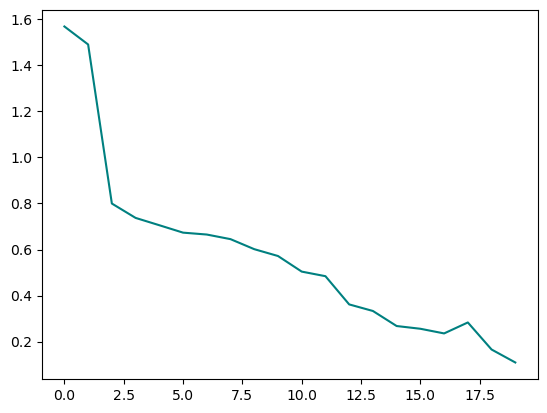

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'val_accuracy'

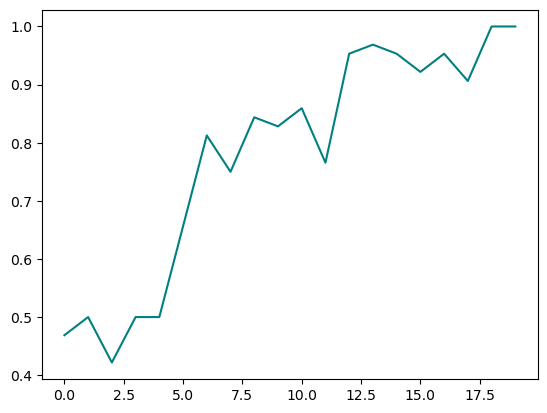

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Prediction

In [120]:
!pip install opencv-python


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


1/1 [==============================] - 0s 35ms/step


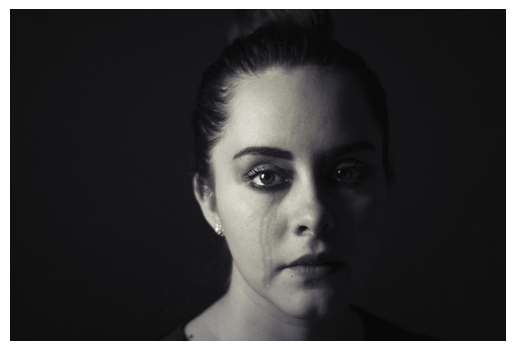

[[0.9745015]]
Prediction: Sad
Resized Image Size: (256, 256)


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2  # Import OpenCV

# Function to load and preprocess an image for prediction
def load_and_process_image(img_path, target_size=(256, 256)):
    # Use OpenCV to load and resize the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Rescale to match the normalization used during training
    return img

# Specify the path to the new image you want to predict
new_image_path = 'test/test_sad/woman-1867127_640.jpg'

# Load and preprocess the new image with resizing to 300x300
new_image = load_and_process_image(new_image_path, target_size=(256, 256))

# Make predictions
predictions = model.predict(new_image)

# Display the original image
img = cv2.imread(new_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, convert to RGB for displaying with matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

# Display the prediction
if predictions[0] > 0.5:
    print(predictions)
    print('Prediction: Sad')
else:
    print(predictions)
    print('Prediction: Happy')

# Display the size of the loaded image
print(f'Resized Image Size: {new_image.shape[1:3]}')